In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simulating data

Simulating data is a very useful skill. Often, you'll find yourself wanting to test an analysis method on a known base case (i.e. where you know data the are normally distributed, or have a linear relationship of known magnitude, etc). In the next two problems, you'll get a chance to practice cooking up some random data, as well as cooking up some data were a simple linear relationship holds. You'll then use these data for some basic fitting procedures. 

```{admonition} Question 2
:class: seealso
Problem 1: Create a 1D numpy array called vrest that simulates resting potentials recorded from 200 cells. Assume that the population the cells come from has a resting potential of -50 (mV), and a standard deviation of 5 mV. Create a histogram of vrest to check that you did the simulation correctly. 
```

Suppose that neruons' peak firing rates are related to their resting potential through a simple linear relationship: 

Firing rate (in Hz) = -1 * resting potential + 20 + Noise

Where 'Noise' is the irreducible noise, and has a mean of 0 and a S.D. of 3

```{admonition} Question 2
:class: seealso
Create a 1D numpy array called 'FR' that implements this mathematical relationship between firing rate and resting potential (for the same 200 neurons). Create a scatterplot between vrest (from above) and FR to verify that you have done this correctly. 
```

Now that you've created a pair of (x,y) points where a simple (but noisy) linear relationship holds, we can start trying to fit statistical models to it. Naturally, we *know* that the relationship really is linear, but in the real world, you will have to do some tinkering to converge on a good model. 

```{admonition} Question 2
:class: seealso
Problem 3: Fit a linear relationship between vrest and FR using scikit learn. List the coefficients of the fit, as well as the intercept. You may need to reshape your array to force it to 1D using .reshape(-1,1). See the previous notebook for a template on doing linear regression in python.
```

Problem 4: Re-run your analysis from above, but swap the variables such that firing rate is now the *independent variable* and resting potential is the *dependent variable*. As above, report the coefficients and intercept from your fit. What do you observe, and does this make sense? 

Linear regression is hardly the only game in town, when it comes to models. There's a whole zoo of models you can throw at a dataset, each of which will have their own 'philosophical stance' toward the world. Scikit-learn makes it easy to pull different models off the shelf, try them out on datasets, and assess their relative merits. This is an iterative process that involves fitting a variety of models, and testing their performance.


```{admonition} Question 2
:class: seealso
Problem 5: Perform a KNN regression on the same dataset (where vrest is the independent variable, and FR is the dependent variable). Run this for the 5 different choices of the parameter n_neighbors shown below, which specifies the number of neighbors to use for prediction. For each run of KNN, report the score. What do you notice about the relationship between score values and number of neighbors? 

n_neighbors: [1, 2, 5, 10, 20, 50]
```

```{admonition} Question 2
:class: seealso
Problem 6: A follow-up to the above. You'll note that some of the model scores above are quite high. In fact, you'll basically always do better on KNN regression if you use a smaller neighborhood. Why wouldn't you always use a neighbohood of one on every prediction task? You'll probably want to look a bit into the concept of **overfitting** 
```

# Covariance and Correlation

The snippet of code below creates a data frame with three sets of noisy measurements with some pairwise correlation. 

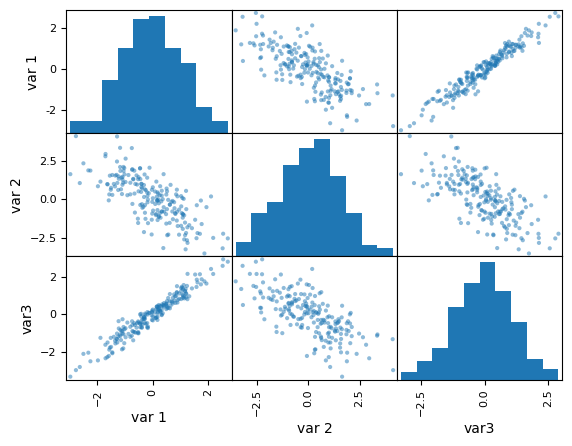

In [64]:
d1 = np.random.randn(200)
d2 = -1 * d1 + np.random.randn(200)
d3 = d1 + 0.3 * np.random.randn(200)

df = pd.DataFrame(data={'var 1': d1, 'var 2': d2, 'var3': d3})
pd.plotting.scatter_matrix(df);

```{admonition} Question 2
:class: seealso
Problem 7: Calculate the covariance between d1 and d3 using the numpy expression np.dot(). Note that you don't need to subtract the mean from anything, because all the data we created have zero mean (verify in the histograms above). 
```

# Intuitions about the F-statistic

The idea of this section is to just give you some intuition into what the F-statistic is reporting when you do a regression. Just like R^2 is a single value you can spit back from your data to give you (roughly) an indication of the strength of the relationship, F is a single value you get that tells you something about the significance of the effect. In the block of code below, we're creating a simple dataset with a number of points that you can specify via the variable numpts: 

F= 13.066526094337076


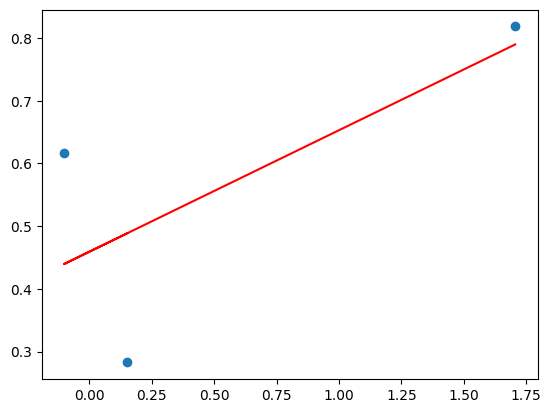

In [114]:
numpts = 3
x = np.random.randn(numpts).reshape(-1,1)
y = x + np.random.randn(numpts).reshape(-1,1)
plt.scatter(x,y);
LR = LinearRegression()
regr = LR.fit(x,y)
pred = regr.predict(x)
plt.plot(x,pred,'r');
f = np.var(x, ddof=1)/np.var(y, ddof=1)
print('F=', f)

```{admonition} Question 2
:class: seealso
Problem 8: Run the snippet of code above 10 times for a choice of numpts =3, 10 times for a choice of numpts=30, and 10 times for a choice of numpts=300. Report the F statistic on each run. What do you notice? How does "collecting more data" (i.e. having more points) affect the behavior of your F values? 
```